In [2]:
library(ks)
library(jmuOutlier)

1. X1, ..., Xn ∼ R[0, θ].

(a) Построить гистограммы для X(n) при разных n и сравнить с нормальной плотностью (с такими же математическим ожиданием и дисперсией, как у X(n)).

10
100


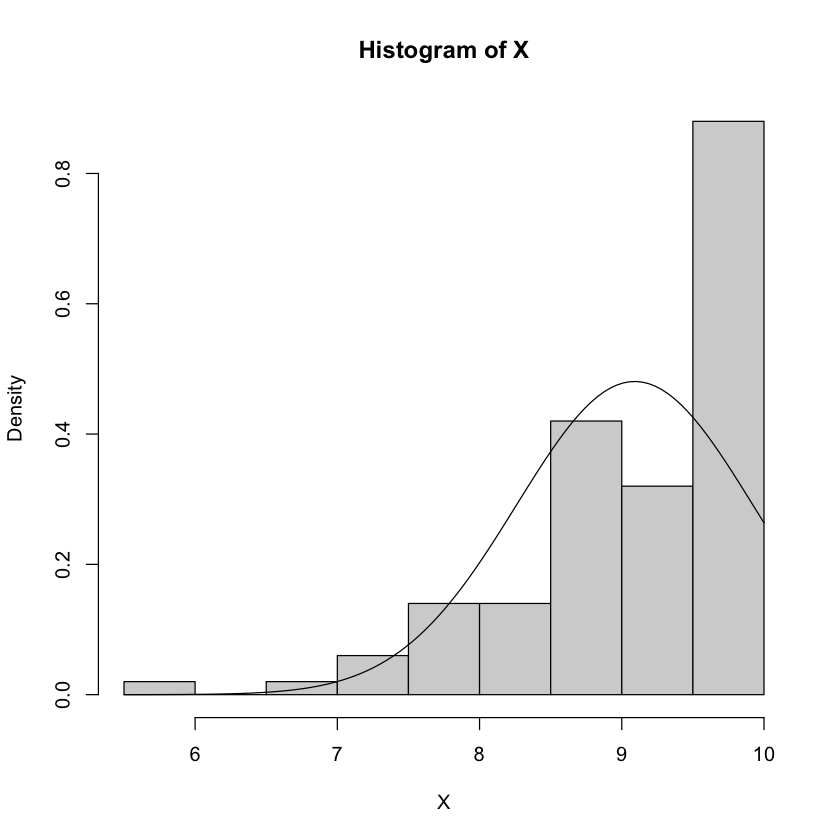

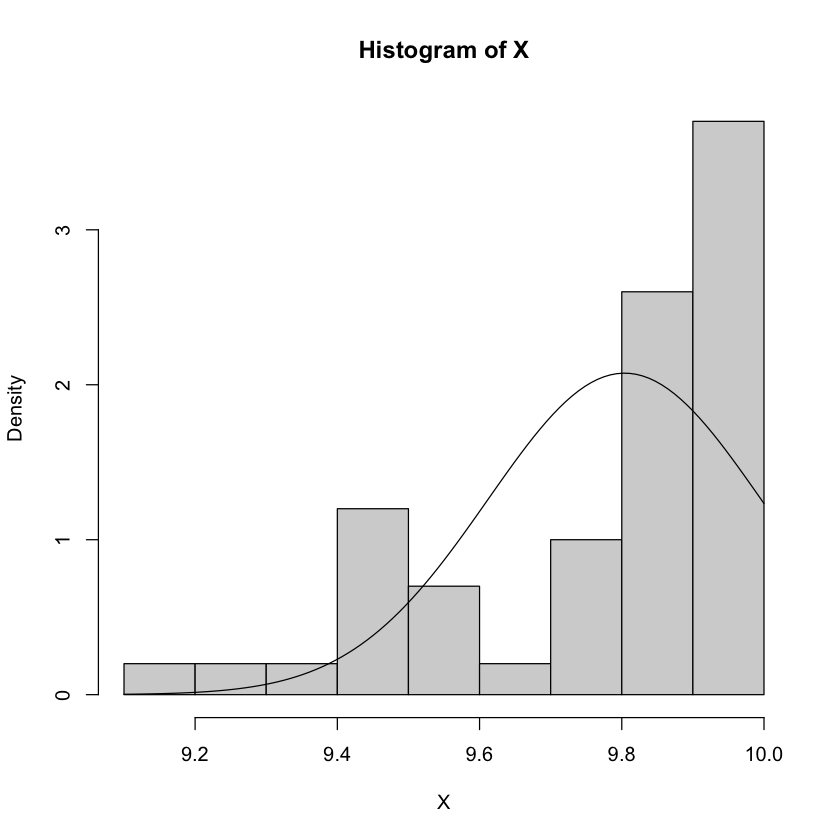

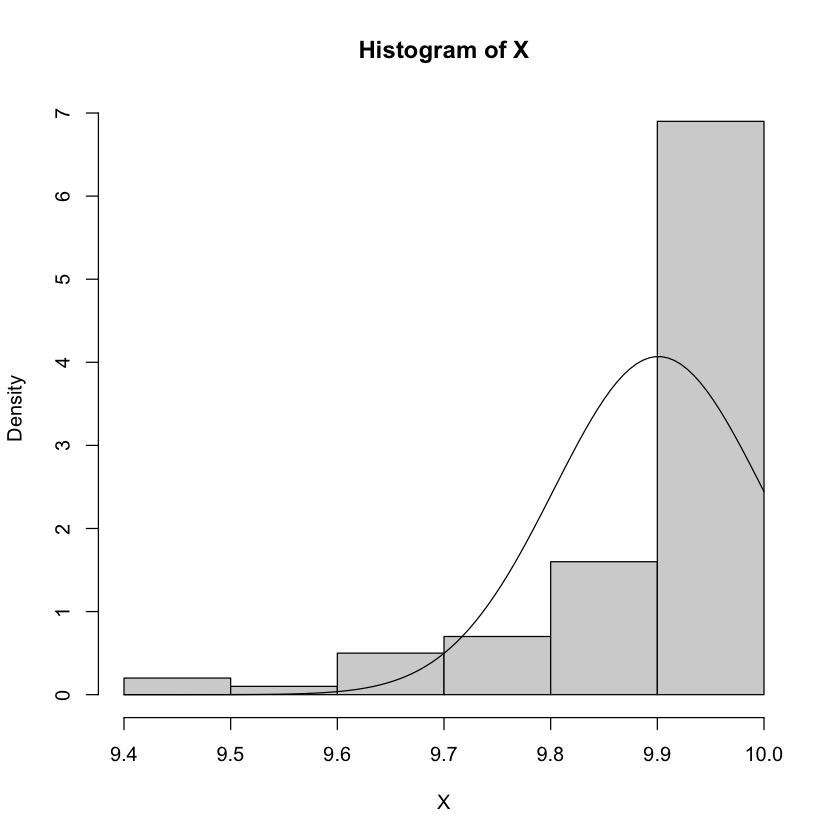

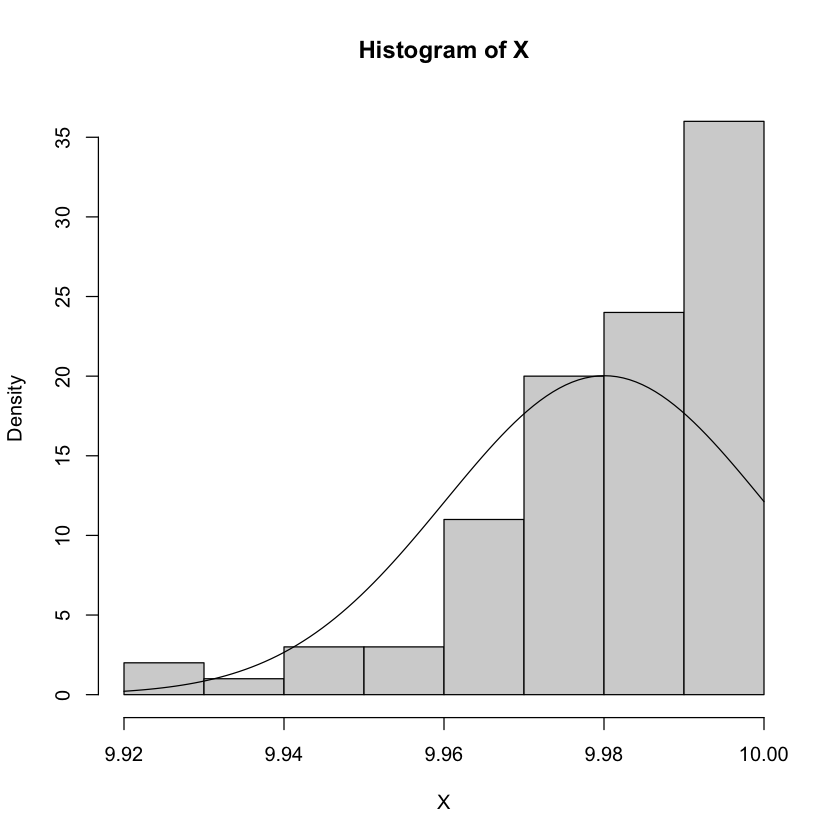

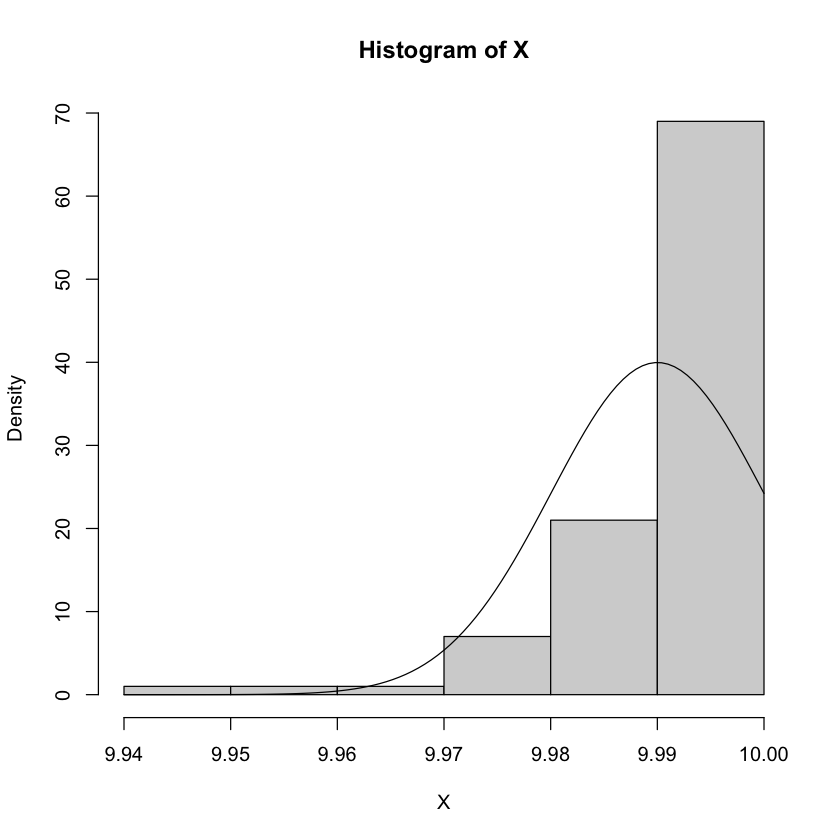

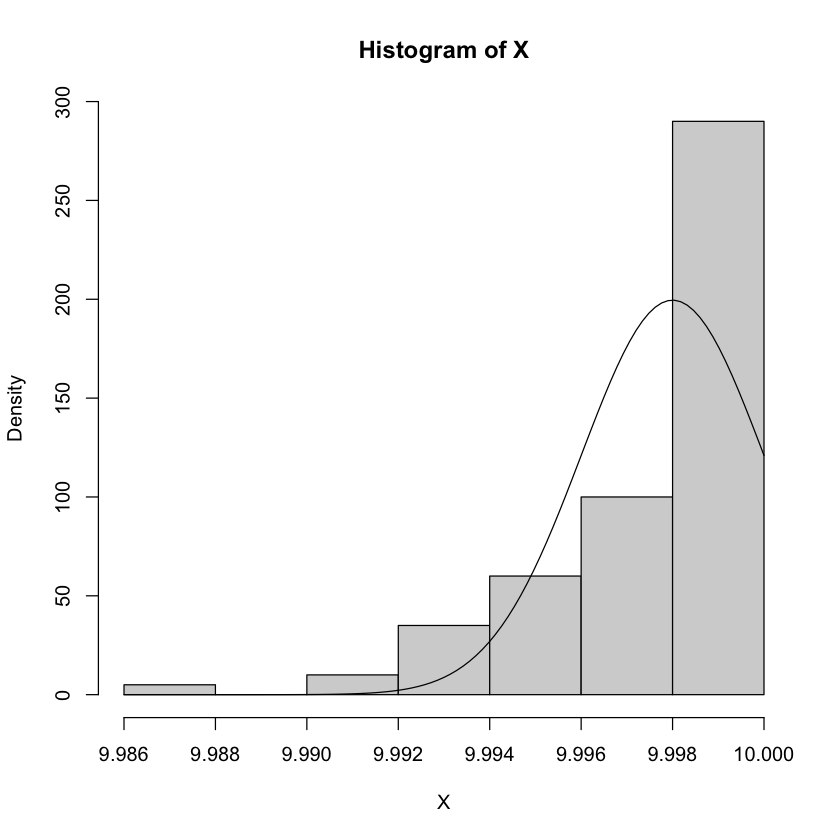

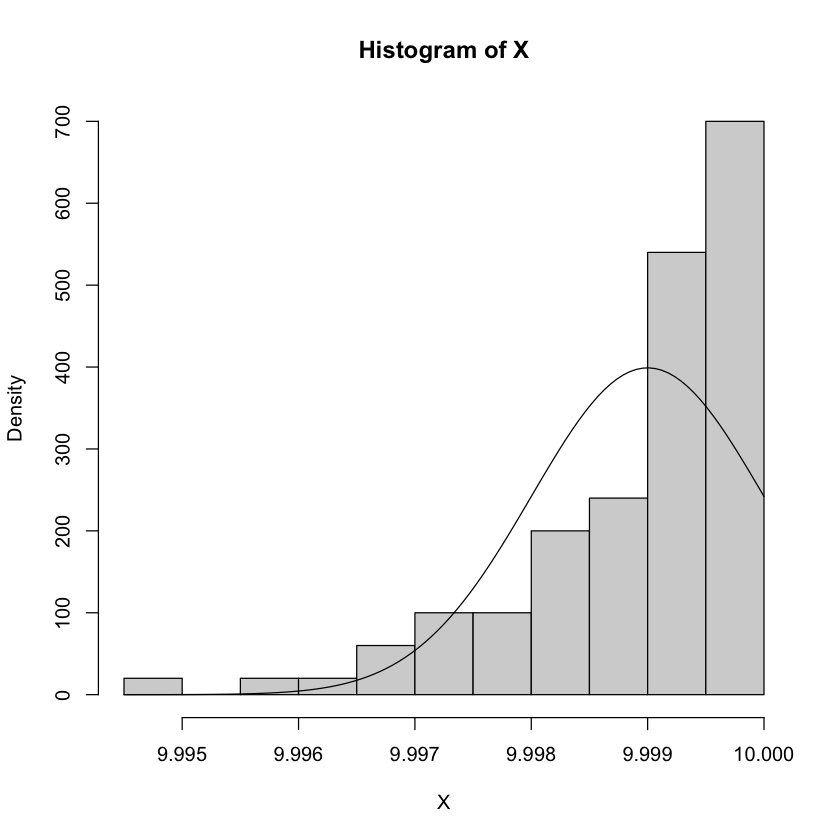

In [24]:
theta=as.double(readline())
times=strtoi(readline())
n=c(10,50,100,500,1000,5000,10000)
for (i in 1:7){
    k=n[i]
    X=0
    for (i in 1:times){
        X0<-runif(k,0,theta)
        X[i]=max(X0)
    }
    hist(X,freq=FALSE)
    curve(dnorm(x,k*theta/(k+1),theta*(k/(k+2)-k^2/(k+1)^2)^0.5),add=TRUE)
}

(b) Построить гистограммы для n(θ−X(n)) при разных n и сравнить с плотностью распределения
exp(1).

10
3000


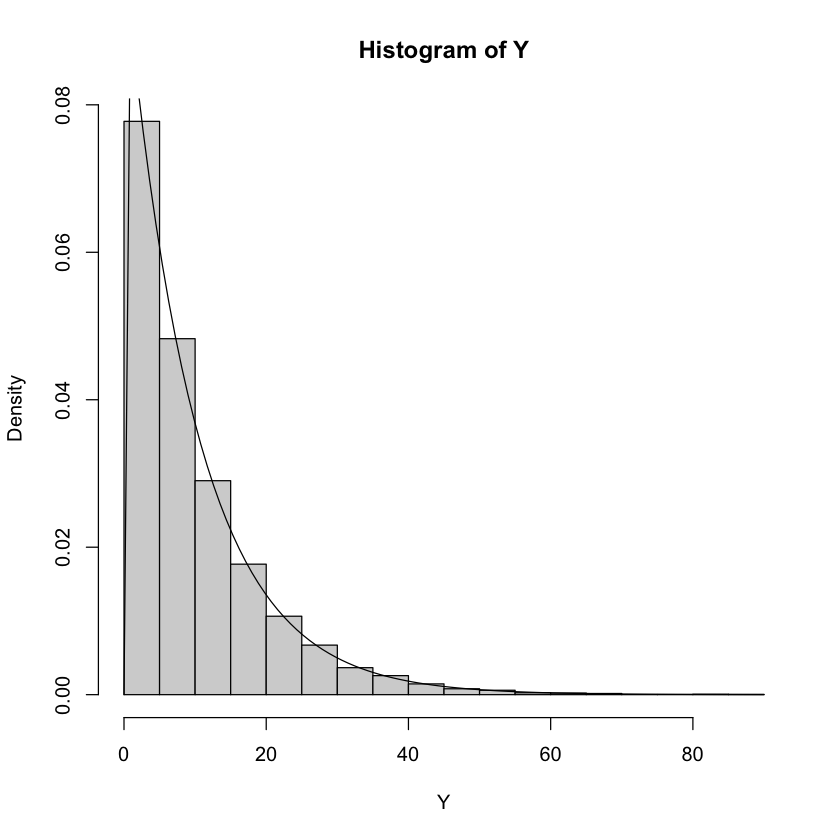

In [6]:
theta=as.double(readline())
n=strtoi(readline())
Y=0
for (i in 1:10000){
    X=max(runif(n,0,theta))
    Y[i]<-n*(theta-X)
}
hist(Y,freq=FALSE)
curve(dexp(x,1/theta),add=TRUE)

(c) * Изобразить гистограммы √n(2X − θ) и √n(2Xα − θ) на одном графике, сравнить разбросы (обе ли оценки асимптотически нормальны, чья асимптотическая дисперсия меньше?).

1
0.3
10000


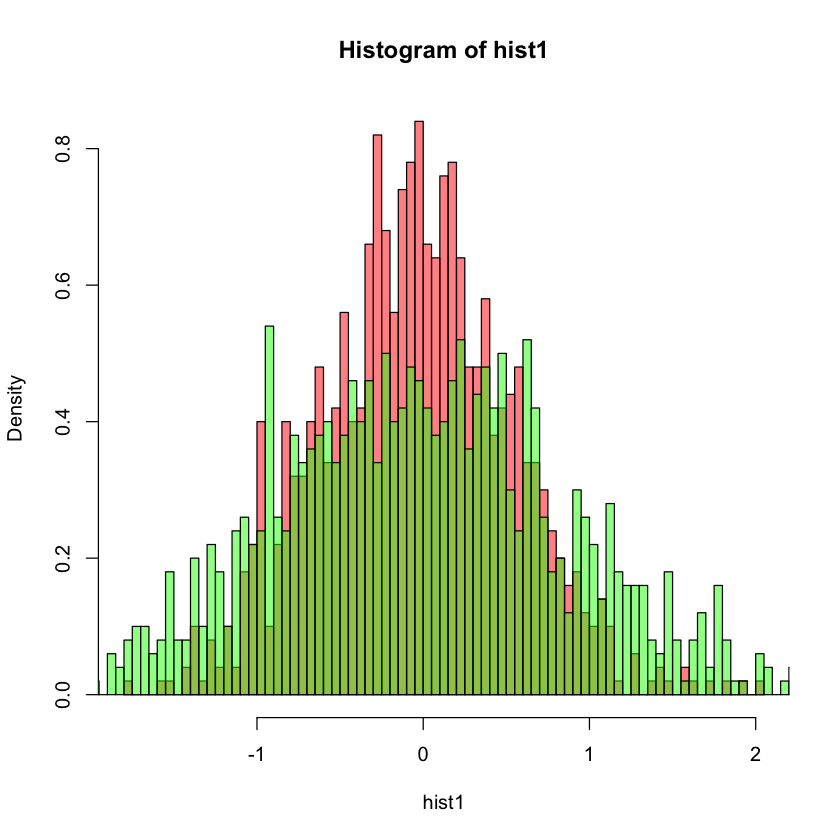

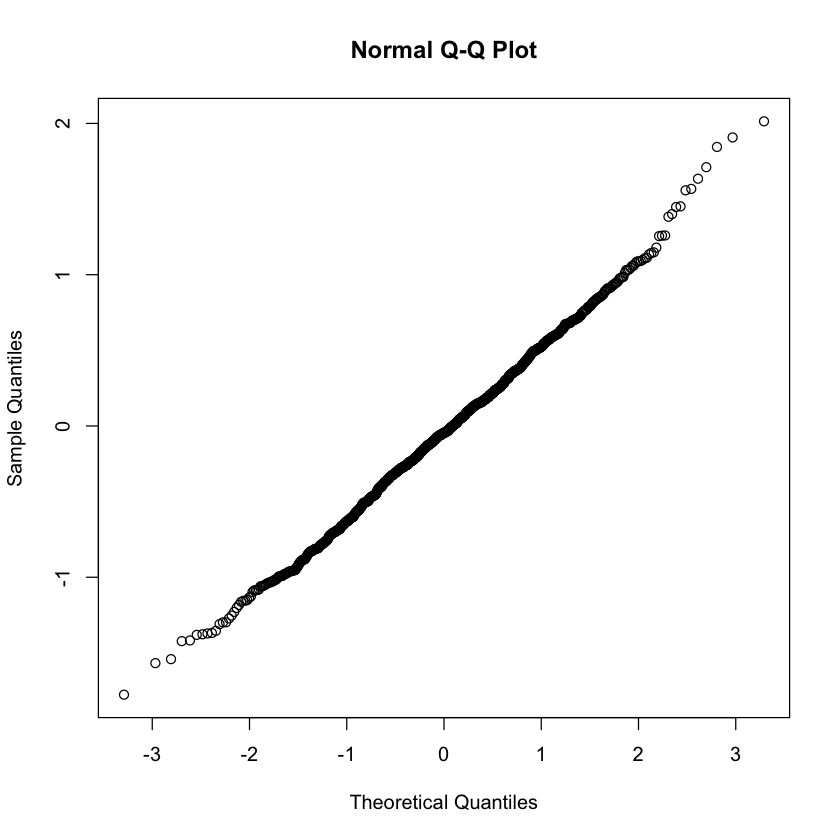

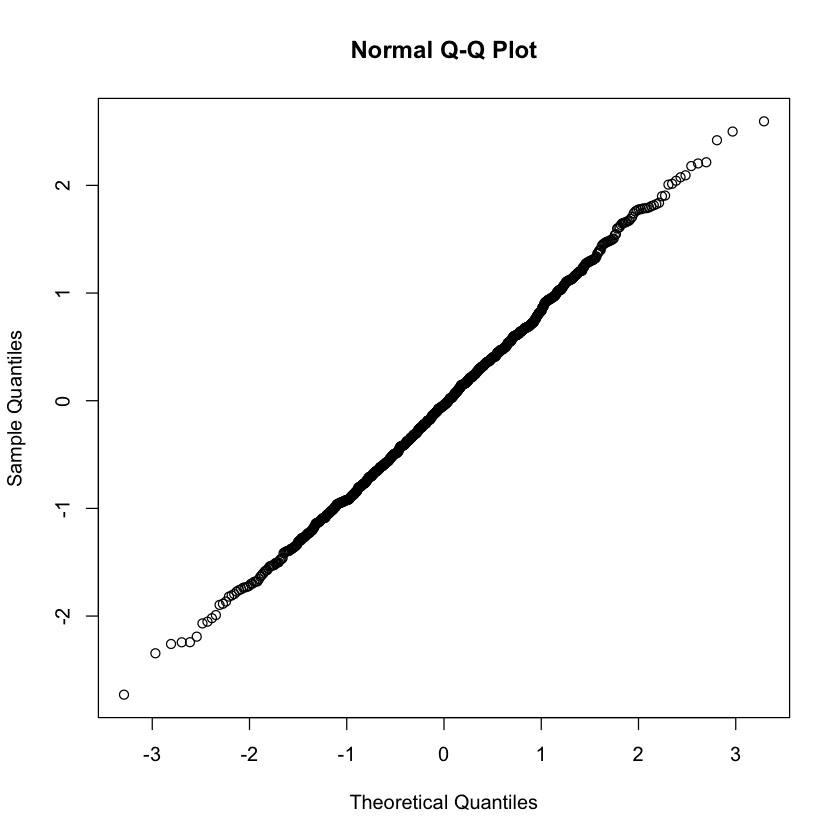

In [26]:
theta=as.double(readline())
alpha=as.double(readline())
n=strtoi(readline())
hist1=0
hist2=0
for (i in (1:1000)){
    X=runif(n,0,theta)
    xbar=mean(X)
    k=floor(alpha*n)
    xalpha=mean(X[(k+1):(n-k)])
    hist1[i]=n^0.5*(2*xbar-theta)
    hist2[i]=n^0.5*(2*xalpha-theta)
}
hist(hist1,freq=FALSE,col=rgb(255,1,1,max=255,alpha=127),breaks=100)
hist(hist2,freq=FALSE,col=rgb(1,255,1,max=255,alpha=127),breaks=100,add=TRUE)
qqnorm(hist1)
qqnorm(hist2)

(d) Сравнить, какая из оценок ((n + 1)/n)X(n) и 2X чаще оказывается ближе к θ при разных n. Для этого смоделировать по 1000 реализаций (для каждого n) и найти, в какой доле из этих 1000 ближе оказалась ((n + 1)/n)X(n).

In [17]:
theta=strtoi(readline())
n=strtoi(readline())
k=0
for (i in (1:1000)){
    X<-runif(n,min=0,max=theta)
    est1=(n+1)/n*max(X)
    est2=2*mean(X)
    if (abs(est1-theta)<abs(est2-theta)){
        k=k+1
    }
}
k/1000

10
100


[1] 0.905

2. X1, . . . , Xn имеет распределение Коши fθ(x) = (π(1 + (x − θ)2))−1

(a) Построить гистограммы для X при разных n. Является ли эта оценка состоятельной? *Сравнить гистограмму/оценку плотности с нормальной плотностью.

1
1000


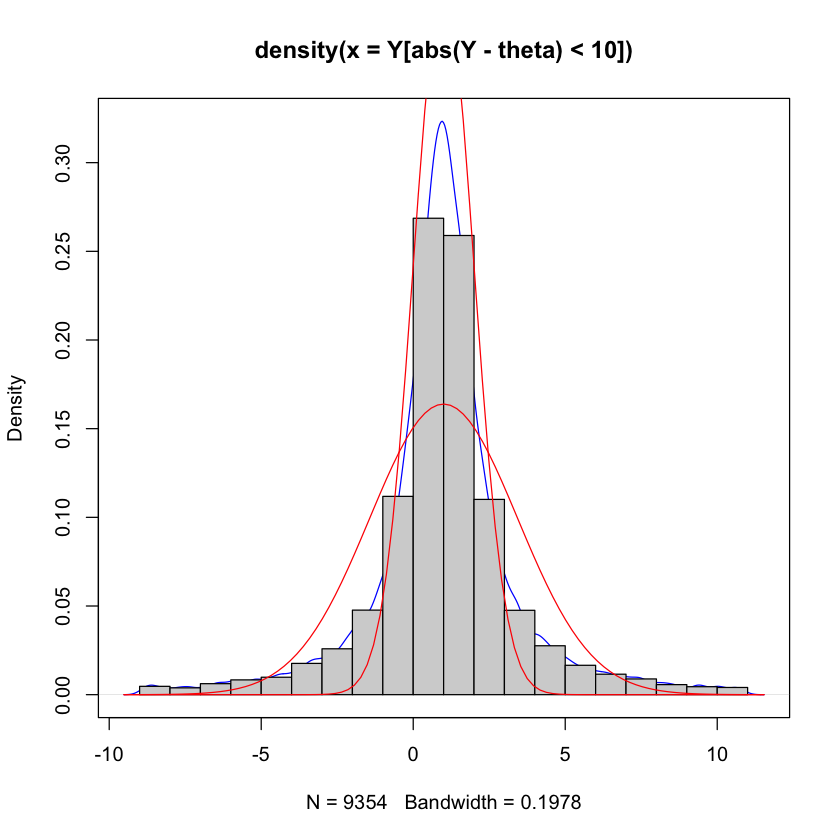

In [26]:
theta=as.double(readline())
n=strtoi(readline())
Y=0
for (i in (1:10000)){
    X<-rcauchy(n,loc=theta,scale=1)
    Y[i]=mean(X)
}
plot(density(Y[abs(Y-theta)<10]),col='blue')
hist(Y[abs(Y-theta)<10],freq=FALSE,add=TRUE)
curve(dnorm(x,theta,sd(Y[abs(Y-theta)<10])),add=TRUE,col='red')
curve(dnorm(x,theta,1),add=TRUE,col='red')

(b) Построить гистограммы √n(MED −θ), сравнить с соответсвующей нормальной плотностью (см. теорему 1).

1
300


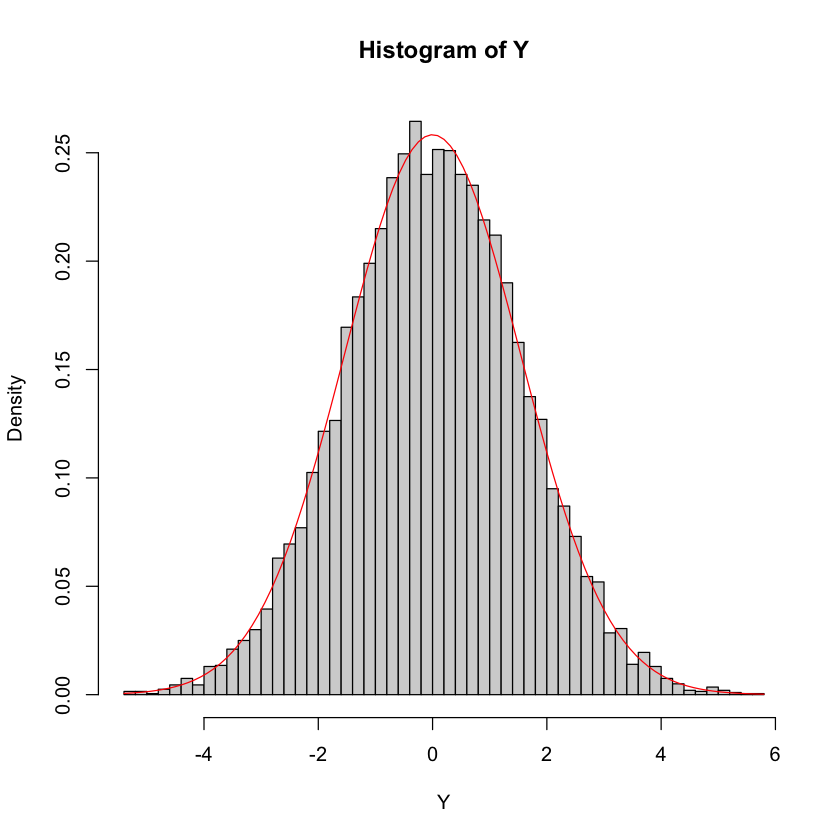

In [27]:
theta=as.double(readline())
n=strtoi(readline())
Y=0
for (i in (1:10000)){
    X<-rcauchy(n,loc=theta,scale=1)
    Y[i] =n^0.5*(median(X)-theta)
}
hist(Y,freq=FALSE,breaks=50)
curve(dnorm(x,0,sd(Y)),add=TRUE,col='red')

3. X1, ..., Xn ∼ Bern(p), где а) p = 1/3 б) p = 1/2. Будет ли MED состоятельна? Асимптотически нормальна? Постройте гистограммы √n(MED −1/2), похоже ли распределение на нормальное?

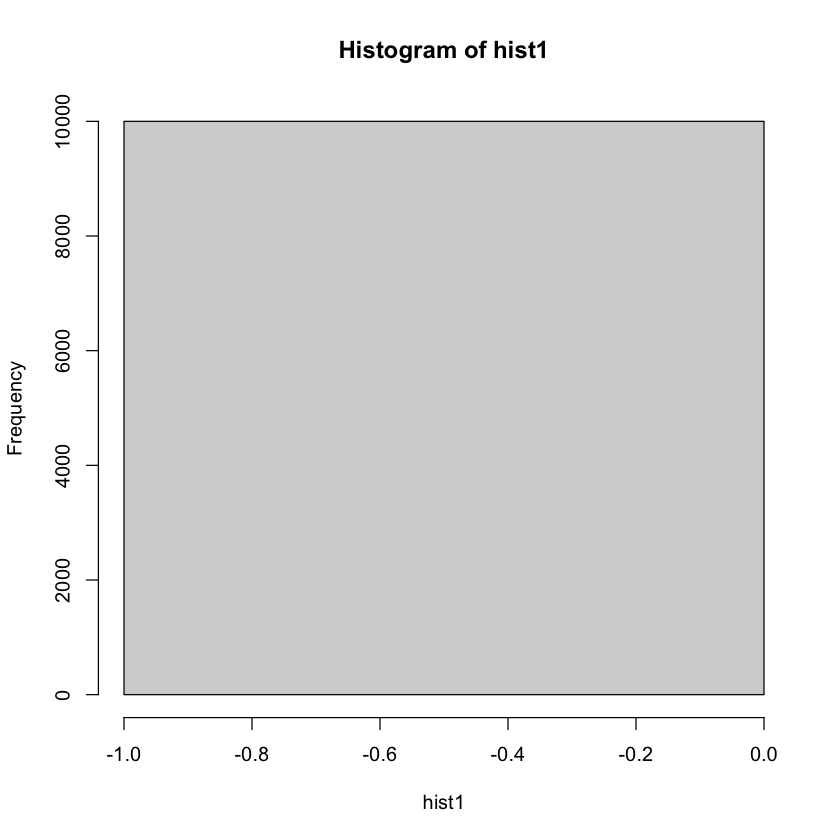

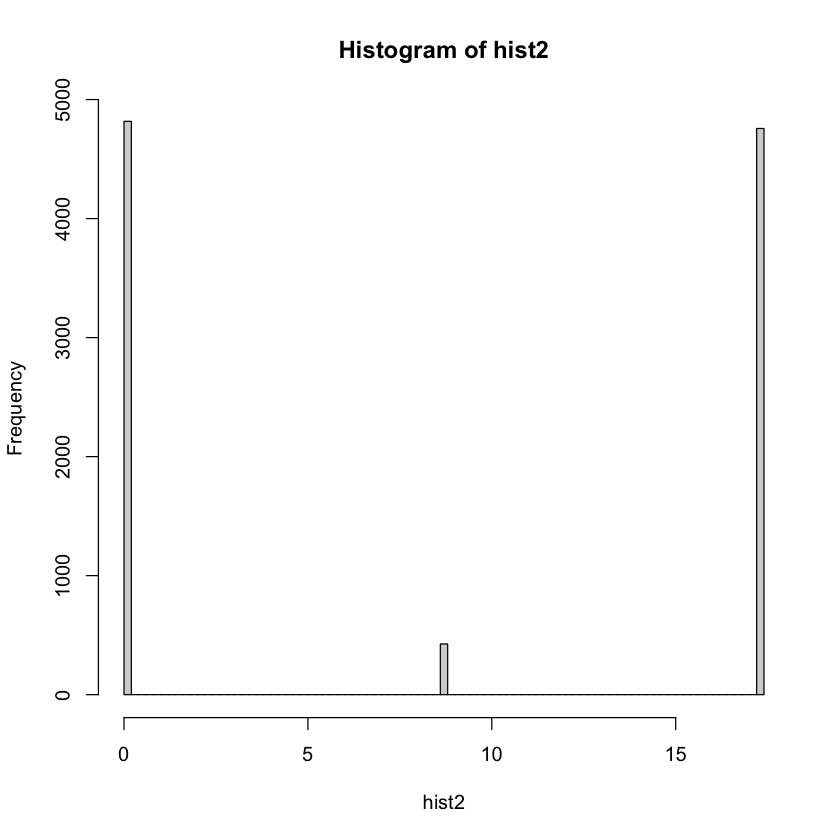

In [30]:
n=strtoi(readline())
hist1=0
hist2=0
for (i in (1:10000)){
    X<-rbinom(n,1,1/3)
    Y<-rbinom(n,1,0.5)
    hist1[i]=n^0.5*(median(X))
    hist2[i]=n^0.5*(median(Y))
}
hist(hist1,breaks=100)
hist(hist2,breaks=100)

4. X1, ..., Xn ∼ R([θ − 2, θ − 1] ∪ [θ + 1, θ + 2]). Будут ли выборочная медиана и усеченные средние а)состоятельны, б) асимптотически нормальны?

10
300
0.3


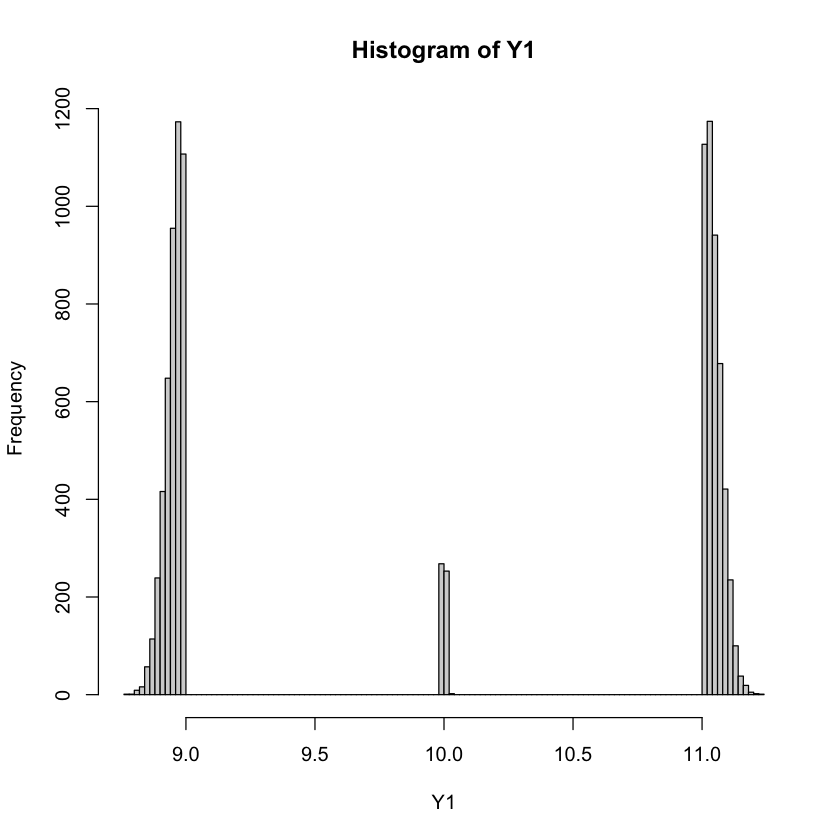

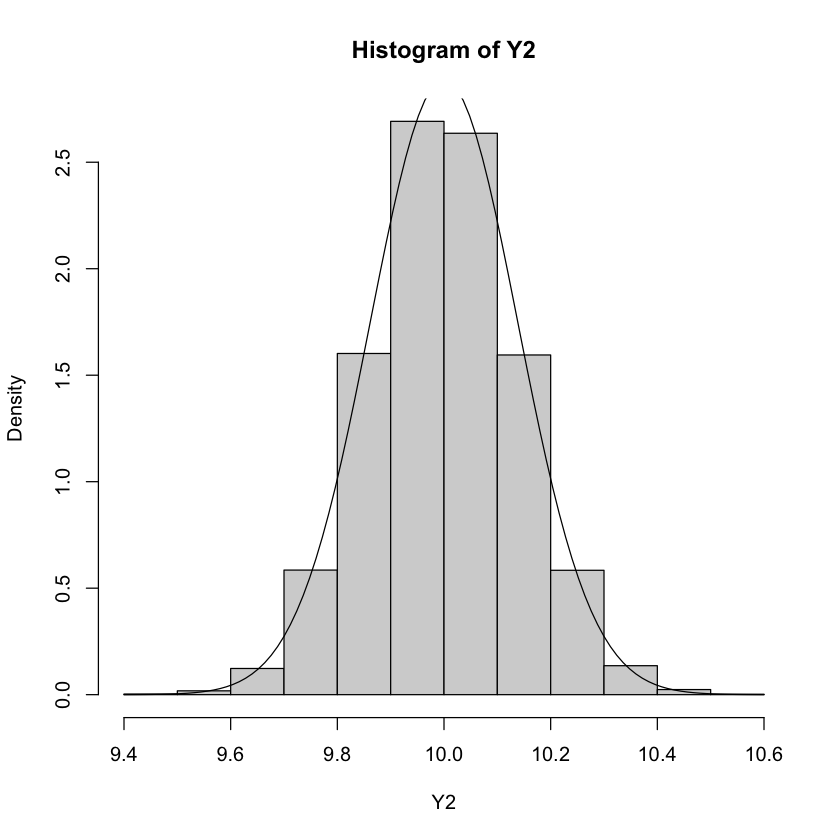

In [18]:
theta=as.double(readline())
n=strtoi(readline())
alpha=as.double(readline())
k=floor(alpha*n)
Y1=0
Y2=0
for (z in (1:10000)){
    X=0
    for (i in (1:n)){
        W=rbinom(1,1,1/2)
        if (W==0){
            X[i]=runif(1,min=theta-2,max=theta-1)
        }else{
            X[i]=runif(1,min=theta+1,max=theta+2)
        }
    }
    Y1[z]=median(X)
    Y2[z]=mean(X[(k+1):(n-k)])
}
hist(Y1,breaks=100)#очев нет
hist(Y2,freq=FALSE)
curve(dnorm(x,theta,sd(Y2)),add=TRUE)

5. Смоделировать выборку из распределения Лапласа и численно сравнить асимптотическую дисперсию медианы, выборочного среднего, Xα с α = 0.1 и α = 0.3. Для этого построить гистограммы или плотности каждого из распределений.

mu 0
b 1
n 500


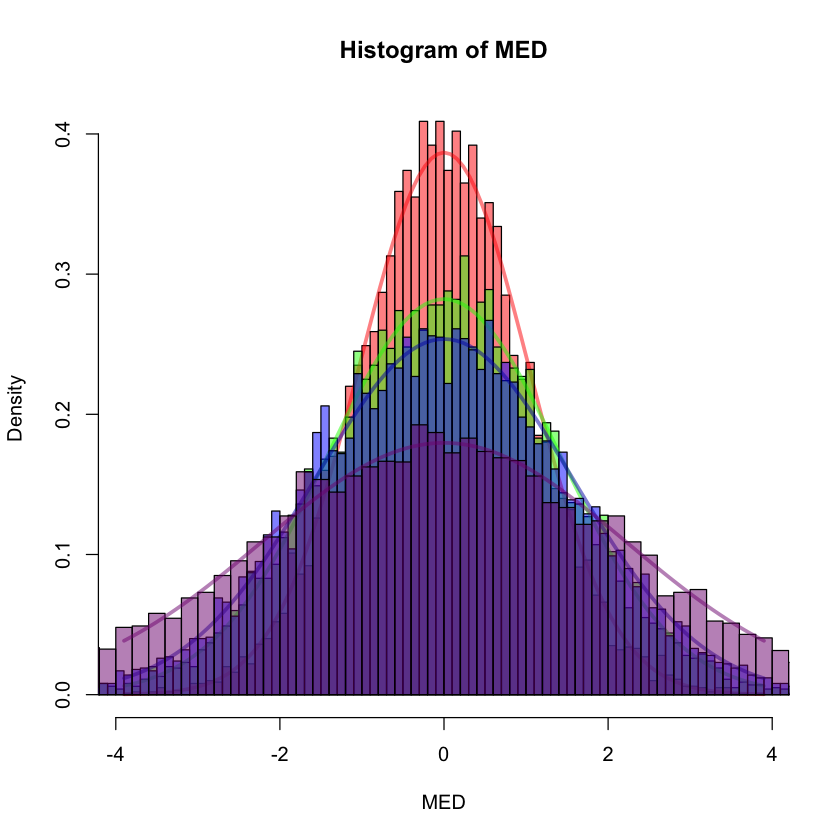

In [3]:
mu=as.double(readline('mu '))
b=as.double(readline('b '))
n=strtoi(readline('n '))
k1=floor(n*0.1)
k3=floor(n*0.3)
MED=0
bar=0
xalpha1=0
xalpha3=0
for (i in (1:10000)){
    X<-rlaplace(n,mean=mu,sd=b*2^0.5)
    MED[i]=n^0.5*(median(X)-mu)
    bar[i]=n^0.5*(mean(X)-mu)
    xalpha1[i]=n^0.5*(mean(X[(k1+1):(n-k1)])-mu)
    xalpha3[i]=n^0.5*(mean(X[(k3+1):(n-k3)])-mu)
}
hist(MED,freq=FALSE,col=rgb(255,0,0,max=255,alpha=127),breaks=100)
curve(dnorm(x,0,sd(MED)),col=rgb(255,0,0,max=255,alpha=127),add=TRUE,lwd=3)
hist(bar,freq=FALSE,add=TRUE,col=rgb(0,255,0,max=255,alpha=127),breaks=100)
curve(dnorm(x,0,sd(bar)),col=rgb(0,255,0,max=255,alpha=127),add=TRUE,lwd=3)
hist(xalpha1,freq=FALSE,add=TRUE,col=rgb(0,0,255,max=255,alpha=127),breaks=100)
curve(dnorm(x,0,sd(xalpha1)),col=rgb(0,0,180,max=255,alpha=127),add=TRUE,lwd=3)
hist(xalpha3,freq=FALSE,add=TRUE,col=rgb(128,0,128,max=255,alpha=127),breaks=100)
curve(dnorm(x,0,sd(xalpha3)),col=rgb(128,0,128,max=255,alpha=127),add=TRUE,lwd=3)